----
## **2 Before we begin: The mathematical building blocks of neural networks**
----

La comprensión del aprendizaje profundo requiere estar familiarizado con muchos conceptos matemáticos simples: tensores, operaciones de tensores, diferenciación, descenso de gradientes, etc. Nuestro objetivo en este capítulo será desarrollar su intuición sobre estas nociones sin ser demasiado técnico. En particular, nos alejaremos de la notación matemática, que puede resultar desagradable para quienes no tienen conocimientos matemáticos y no es necesaria para explicar bien las cosas. La descripción más precisa e inequívoca de una operación matemática es su código ejecutable.

Para agregar algo de contexto para los tensores y el descenso de gradientes, comenzaremos el capítulo con un ejemplo práctico de una red neuronal. Luego repasaremos cada nuevo concepto que se ha introducido, punto por punto. ¡Tenga en cuenta que estos conceptos serán esenciales para que comprenda los ejemplos prácticos que vendrán en los siguientes capítulos!

Después de leer este capítulo, tendrá una comprensión intuitiva de la teoría matemática detrás del aprendizaje profundo y estará listo para comenzar a sumergirse en Keras y TensorFlow, en el capítulo 3.

**2.1 Un primer vistazo a una red neuronal**

Veamos un ejemplo concreto de una red neuronal que usa la biblioteca de Python Keras para aprender a clasificar dígitos escritos a mano. A menos que ya tenga experiencia con Keras o bibliotecas similares, no comprenderá todo sobre este primer ejemplo de inmediato. Probablemente ni siquiera haya instalado Keras todavía; esta bien. En el siguiente capítulo, revisaremos cada elemento del ejemplo y los explicaremos en detalle. Así que no se preocupe si algunos pasos le parecen arbitrarios o mágicos. Tenemos que empezar por alguna parte.

El problema que estamos tratando de resolver aquí es clasificar las imágenes en escala de grises de dígitos escritos a mano (28 × 28 píxeles) en sus 10 categorías (0 a 9). Usaremos el conjunto de datos MNIST, un clásico en la comunidad de aprendizaje automático, que ha existido casi tanto tiempo como el campo mismo y se ha estudiado intensamente. Es un conjunto de 60,000 imágenes de entrenamiento, más 10,000 imágenes de prueba, ensambladas por el Instituto Nacional de Estándares y Tecnología (el NIST en MNIST) en la década de 1980. Puede pensar en "resolver" MNIST como el "Hola mundo" del aprendizaje profundo: es lo que hace para verificar que sus algoritmos funcionan como se esperaba. A medida que se convierta en un practicante del aprendizaje automático, verá que MNIST aparece una y otra vez, en artículos científicos, publicaciones de blogs, etc. Puede ver algunos ejemplos de MNIST en la figura 2.1.

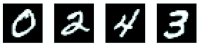

No es necesario que intente reproducir este ejemplo en su máquina ahora mismo. Si lo desea, primero deberá configurar un espacio de trabajo de aprendizaje profundo, que se trata en el capítulo 3.

El conjunto de datos MNIST viene precargado en Keras, en forma de un conjunto de cuatro matrices NumPy.

In [17]:
from keras.datasets import mnist

In [18]:
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

**train_images** y **train_labels** forman el conjunto de entrenamiento, los datos de los que aprenderá el modelo. A continuación, el modelo se probará en el equipo de prueba test_imagesy test_labels. Las imágenes están codificadas como matrices NumPy y las etiquetas son una matriz de dígitos, que van de 0 a 9. Las imágenes y las etiquetas tienen una correspondencia uno a uno.

In [19]:
## Train data:
train_images.shape

(60000, 28, 28)

In [20]:
len(train_labels)

60000

In [21]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [22]:
## Test Data:
test_images.shape

(10000, 28, 28)

In [23]:
len(test_labels)

10000

In [24]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

El flujo de trabajo será el siguiente: Primero, alimentaremos la red neuronal con los datos de entrenamiento train_images y train_labels. Entonces, la red aprenderá a asociar imágenes y etiquetas. Finalmente, le pediremos a la red que produzca predicciones test_images y verificaremos si estas predicciones coinciden con las etiquetas de test_labels.

Construyamos la red; de nuevo, recuerde que todavía no se espera que comprenda todo sobre este ejemplo.

In [25]:
## Arquitectura de la red:
from tensorflow.keras import models
from tensorflow.keras import layers

El componente básico de las redes neuronales es la "capa", un módulo de procesamiento de datos que puede concebir como un "filtro" de datos. Algunos datos entran y salen en una forma más útil. Precisamente, las capas extraen representaciones de los datos que se les suministran, con suerte representaciones que son más significativas para el problema en cuestión. La mayor parte del aprendizaje profundo realmente consiste en encadenar capas simples que implementarán una forma de "destilación de datos" progresiva. Un modelo de aprendizaje profundo es como un tamiz para el procesamiento de datos, hecho de una sucesión de filtros de datos cada vez más refinados: las "capas".

Aquí nuestra red consta de una secuencia de dos capas densas, que son capas neuronales densamente conectadas (también llamadas "completamente conectadas"). La segunda (y última) capa es una capa "softmax" de 10 direcciones, lo que significa que devolverá una matriz de 10 puntuaciones de probabilidad (sumando 1). Cada puntuación será la probabilidad de que la imagen del dígito actual pertenezca a una de nuestras clases de 10 dígitos.

Para que nuestra red esté lista para la capacitación, debemos elegir tres cosas más, como parte del paso de "compilación":

* Una función de pérdida: es la forma en que la red podrá medir qué tan bien está haciendo el trabajo con sus datos de entrenamiento y, por lo tanto, cómo podrá dirigirse en la dirección correcta.
* Un optimizador: este es el mecanismo a través del cual la red se actualizará en función de los datos que ve y su función de pérdida.
* Métricas para monitorear durante el entrenamiento y las pruebas. Aquí solo nos preocuparemos por la precisión (la fracción de las imágenes que se clasificaron correctamente).

El propósito exacto de la función de pérdida y el optimizador se aclarará a lo largo de los dos capítulos siguientes.

In [26]:
## Model:
model = models.Sequential([
                   layers.Dense(512, activation='relu'),
                   layers.Dense(10,activation='softmax')])

In [29]:
## Compilacion:
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

Antes del entrenamiento, preprocesaremos nuestros datos dándoles la forma que espera la red y escalando para que todos los valores estén en el intervalo [0, 1]. Anteriormente, nuestras imágenes de entrenamiento, por ejemplo, se almacenaban en una matriz de forma (60000, 28, 28) de tipo uint8 con valores en el intervalo [0, 255]. Lo transformamos en una matriz de forma float32 (60000, 28 * 28) con valores entre 0 y 1.

In [30]:
## Preparando datos de imagen:

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

También necesitamos codificar categóricamente las etiquetas, un paso que explicamos en el capítulo 3:

In [31]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Ya estamos listos para entrenar nuestra red, que en Keras se realiza mediante una llamada al método de ajuste de la red: "ajustamos" el modelo a sus datos de entrenamiento.

In [32]:
## Training the model:
model.fit(train_images, train_labels, epochs= 5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 1.8912 - accuracy: 0.5312
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.6711 - accuracy: 0.8378
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.4315 - accuracy: 0.8841
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3567 - accuracy: 0.8996
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3274 - accuracy: 0.9071


Se muestran dos cantidades durante el entrenamiento: la "pérdida" de la red sobre los datos de entrenamiento y la precisión de la red sobre los datos de entrenamiento.

Rápidamente alcanzamos una precisión de 0,989 (es decir, 98,9%) en los datos de entrenamiento. Ahora, verifiquemos que nuestro modelo también funcione bien en el conjunto de prueba:

In [ ]:
## Usando el modelo para hacer predicciones:
test_digits = test_images[0:10]
prediction = model.predict(test_digits)
prediction[0]

array([4.7413170e-18, 5.2160272e-25, 5.1444748e-17, 6.5714936e-13,
       6.7997394e-25, 8.5817074e-20, 5.5731776e-28, 1.0000000e+00,
       3.4032619e-17, 1.5964236e-15], dtype=float32)

In [ ]:
prediction[0].argmax()

7

In [ ]:
prediction[0][7]

1.0

In [ ]:
test_labels[0]

7

In [ ]:
## Evaluacion del modelo sobre nuevos datos:
test_loss , test_acc = model.evaluate(test_images, test_labels)
print('ACC:', round(test_acc,4))
print('LOSS:', round(test_loss,4))

313/313 [==============================] - 1s 2ms/step - loss: 0.0890 - accuracy: 0.9828
ACC: 0.9828
LOSS: 0.089


La precisión de nuestro conjunto de prueba resulta ser del 97,8%, lo que es bastante menor que la precisión del conjunto de entrenamiento. Esta brecha entre la precisión del entrenamiento y la precisión de la prueba es un ejemplo de "sobreajuste", el hecho de que los modelos de aprendizaje automático tienden a funcionar peor con datos nuevos que con sus datos de entrenamiento. El sobreajuste será un tema central en el capítulo 3.

Con esto concluye nuestro primer ejemplo: acabas de ver cómo podríamos construir y entrenar una red neuronal para clasificar dígitos escritos a mano, en menos de 20 líneas de código Python. En el próximo capítulo, repasaremos en detalle cada pieza en movimiento que acabamos de ver y aclararemos lo que realmente está sucediendo detrás de escena. Aprenderá sobre los "tensores", los objetos de almacenamiento de datos que entran en la red, sobre las operaciones de los tensores, de qué capas están hechas, y sobre el descenso de gradientes, lo que permite a nuestra red aprender de sus ejemplos de entrenamiento.

**2.2 Representaciones de datos para redes neuronales**

En el ejemplo anterior, partimos de datos almacenados en Numpy multidimensional
matrices, también llamadas tensores. En general, todos los sistemas actuales de aprendizaje automático utilizan tensores
como su estructura de datos básica. Los tensores son fundamentales para el campo, tan fundamentales
que TensorFlow de Google lleva su nombre. Entonces, ¿qué es un tensor?
  En esencia, un tensor es un contenedor de datos, casi siempre datos numéricos. Entonces, es un
contenedor para números. Es posible que ya esté familiarizado con las matrices, que son tensores 2D: los tensores son una generalización de matrices a un número arbitrario de dimensiones.
(tenga en cuenta que en el contexto de tensores, una dimensión a menudo se llama eje).

**2.2.1 Escalares (tensores 0D)**

Un tensor que contiene solo un número se llama escalar (o tensor escalar o 0-dimensional
tensor o tensor 0D). En Numpy, un número float32 o float64 es un tensor escalar (o escalar
formación). Puede mostrar el número de ejes de un tensor Numpy a través del atributo ndim; un tensor escalar tiene 0 ejes (ndim == 0). El número de ejes de un tensor también se denomina rango.
Aquí hay un escalar Numpy:

In [33]:
import numpy as np
x = np.array(12)
x

array(12)

In [34]:
x.ndim

0

**2.2.2 Vectores (tensores 1D)**

Una matriz de números se llama vector o tensor 1D. Se dice que un tensor 1D tiene exactamente
un eje. A continuación se muestra un vector Numpy:

In [35]:
x = np.array([12,3,6,14])
x

array([12,  3,  6, 14])

In [36]:
x.ndim

1

Este vector tiene cinco entradas, por lo que se denomina vector de 5 dimensiones. No confundas un 5D
vector con un tensor 5D! Un vector 5D tiene un solo eje y cinco dimensiones a lo largo de su
eje, mientras que un tensor 5D tiene cinco ejes (y puede tener cualquier número de dimensiones
a lo largo de cada eje). La dimensionalidad puede denotar el número de entradas a lo largo de un eje específico (como en el caso de nuestro vector 5D) o el número de ejes en un tensor (como un
Tensor 5D), que a veces puede resultar confuso. En el último caso, técnicamente es más
correcto para hablar de un tensor de rango 5 (el rango de un tensor es el número de ejes),
pero el tensor 5D de notación ambigua es común independientemente.

**2.2.3 Matrices (tensores 2D)**

Una matriz de vectores es una matriz o tensor 2D. Una matriz tiene dos ejes (a menudo denominados
filas y columnas). Puede interpretar visualmente una matriz como una cuadrícula rectangular de números.
Esta es una matriz Numpy:

In [37]:
x = np.array([[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [38]:
x.ndim

2

Las entradas del primer eje se denominan filas y las entradas del segundo eje
se llaman las columnas. En el ejemplo anterior, [5, 78, 2, 34, 0] es la primera fila de x,
y [5, 6, 7] es la primera columna.

**2.2.5 Key attributes**

Un tensor se define por tres atributos clave:
* Número de ejes (rango): por ejemplo, un tensor 3D tiene tres ejes y una matriz tiene
dos ejes. Esto también se denomina ndim del tensor en bibliotecas de Python como Numpy.
* Shape: esta es una tupla de números enteros que describe cuántas dimensiones tiene el tensor a lo largo de cada eje. Por ejemplo, el ejemplo de matriz anterior tiene forma
(3, 5), y el ejemplo del tensor 3D tiene la forma (3, 3, 5). Un vector tiene forma
con un solo elemento, como (5,), mientras que un escalar tiene una forma vacía, ().
* Tipo de datos (generalmente llamado dtype en las bibliotecas de Python): este es el tipo de datos
contenido en el tensor; por ejemplo, el tipo de un tensor podría ser float32, uint8,
float64 y así sucesivamente. En raras ocasiones, es posible que vea un tensor de caracteres. Tenga en cuenta que
los tensores de cuerda no existen en Numpy (o en la mayoría de las otras bibliotecas), porque los tensores
viven en segmentos de memoria contiguos y preasignados: y cadenas, siendo variables
longitud, impediría el uso de esta implementación.

Para que esto sea más concreto, analicemos los datos que procesamos en el MNIST.
ejemplo. Primero, cargamos el conjunto de datos MNIST:

In [39]:
from keras.datasets import mnist
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

In [40]:
## Number of axes the tensor:
print(train_images.ndim)

3


In [41]:
## Shape:
print(train_images.shape)

(60000, 28, 28)


In [42]:
## dtype:
print(train_images.dtype)

uint8


Entonces, lo que tenemos aquí es un tensor 3D de enteros de 8 bits. Más precisamente, es una variedad de
60.000 matrices de 28 × 8 enteros. Cada una de estas matrices es una imagen en escala de grises, con coeficientes entre 0 y 255.
  Visualicemos el cuarto dígito en este tensor 3D, usando la biblioteca Matplotlib (parte de
la suite científica estándar de Python)

In [45]:
digit = train_images[4]

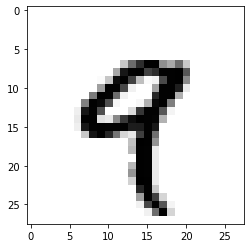

In [47]:
import matplotlib.pyplot as plt
plt.imshow(digit, cmap= plt.cm.binary)
plt.show()

**2.2.6 Manipulating tensors in Numpy**

En el ejemplo anterior, seleccionamos un dígito específico junto al primer eje usando el
sintaxis train_images [i]. La selección de elementos específicos en un tensor se llama corte de tensor.
Veamos las operaciones de corte de tensor que puede hacer en matrices Numpy.
  El siguiente ejemplo selecciona los dígitos del n. ° 10 al n. ° 100 (el n. ° 100 no está incluido) y coloca
ellos en una matriz de formas (90, 28, 28):

In [49]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


Es equivalente a esta notación más detallada, que especifica un índice de inicio y un final
índice para el corte a lo largo de cada eje tensorial. Tenga en cuenta que: es equivalente a seleccionar el
eje entero:

In [50]:
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

(90, 28, 28)


En general, puede seleccionar entre dos índices cualesquiera a lo largo de cada eje tensorial. por
Por ejemplo, para seleccionar 14 × 14 píxeles en la esquina inferior derecha de todas las imágenes,
hacer esto:

In [51]:
my_slice = train_images[10:100, 14:, 14:]
print(my_slice.shape)

(90, 14, 14)


**2.2.7 The notion of data batches**

En general, el primer eje (eje 0, porque la indexación comienza en 0) en todos los tensores de datos
encontrar en el aprendizaje profundo será el eje de las muestras (a veces llamadas muestras
dimensión). En el ejemplo de MNIST, las muestras son imágenes de dígitos.
  Además, los modelos de aprendizaje profundo no procesan un conjunto de datos completo a la vez; más bien,
dividen los datos en pequeños lotes. Concretamente, aquí hay un lote de nuestros dígitos MNIST, con un tamaño de lote de 128:

In [52]:
batch = train_images[:128]

In [53]:
batch = train_images[128:256]

Al considerar un tensor de lote de este tipo, el primer eje (eje 0) se denomina eje de lote o
dimensión del lote. Este es un término que encontrará con frecuencia cuando utilice Keras y otros
bibliotecas de aprendizaje profundo.

**2.2.8 Real-world examples of data tensors**

Hagamos que los tensores de datos sean más concretos con algunos ejemplos similares a los que verá
encuentro más tarde. Los datos que manipulará casi siempre se incluirán en una de las siguientes categorías:
* Datos vectoriales: tensores de forma 2D (muestras, características)
* Datos de series de tiempo o datos de secuencia: tensores de forma 3D (muestras, pasos de tiempo,
caracteristicas)
* Imágenes: tensores de forma 4D (muestras, altura, ancho, canales) o (muestras,
canales, alto, ancho)
* Vídeo: tensores de forma 5D (muestras, fotogramas, altura, ancho, canales) o
(muestras, marcos, canales, alto, ancho)

**2.2.9 Vector data**

Este es el caso más común. En un conjunto de datos de este tipo, cada punto de datos se puede codificar
como un vector, y por lo tanto un lote de datos se codificará como un tensor 2D (es decir, una matriz de
vectores), donde el primer eje es el eje de muestras y el segundo eje es el eje de características.
  Echemos un vistazo a dos ejemplos:
* Un conjunto de datos actuariales de personas, en el que consideramos la edad, el código postal,
e ingresos. Cada persona puede caracterizarse como un vector de 3 valores, y así
un conjunto de datos completo de 100.000 personas se puede almacenar en un tensor de forma 2D
(100000, 3).
* Un conjunto de datos de documentos de texto, donde representamos cada documento por los recuentos.
de cuántas veces aparece cada palabra en él (de un diccionario de 20.000 palabras comunes). Cada documento se puede codificar como un vector de 20.000 valores (uno
contar por palabra en el diccionario), y por lo tanto un conjunto de datos completo de 500 documentos
se puede almacenar en un tensor de forma (500, 20000).

**2.2.10 Timeseries data or sequence data**

Siempre que el tiempo importe en sus datos (o la noción de orden de secuencia), tiene sentido
para almacenarlo en un tensor 3D con un eje de tiempo explícito. Cada muestra se puede codificar como
secuencia de vectores (un tensor 2D) y, por lo tanto, un lote de datos se codificará como un
tensor.

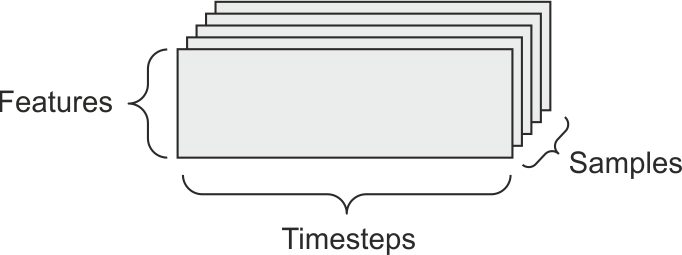

El eje de tiempo es siempre el segundo eje (eje del índice 1), por convención. Veamos un
algunos ejemplos:
* Un conjunto de datos de precios de acciones. Cada minuto, almacenamos el precio actual de las acciones,
el precio más alto en el último minuto y el precio más bajo en el último minuto.
Por lo tanto, cada minuto se codifica como un vector 3D, un día completo de negociación es
codificado como un tensor de forma 2D (390, 3) (hay 390 minutos en un comercio
día), y 250 días de datos se pueden almacenar en un tensor de forma 3D (250,
390, 3). Aquí, cada muestra sería el valor de un día de datos.
* Un conjunto de datos de tweets, donde codificamos cada tweet como una secuencia de 280 caracteres.
de un alfabeto de 128 caracteres únicos. En este escenario, cada personaje puede
codificarse como un vector binario de tamaño 128 (un vector de todos ceros excepto una entrada 1
en el índice correspondiente al carácter). Entonces cada tweet se puede codificar
como un tensor de forma 2D (280, 128), y un conjunto de datos de 1 millón de tweets se puede
almacenado en un tensor de forma (1000000, 280, 128).

**2.2.11 Image data**

Las imágenes suelen tener tres dimensiones: alto, ancho y profundidad de color. A pesar de que
Las imágenes en escala de grises (como nuestros dígitos MNIST) tienen un solo canal de color y podrían
así almacenarse en tensores 2D, por convención los tensores de imagen son siempre 3D, con un canal de color unidimensional para imágenes en escala de grises. Un lote de 128 imágenes en escala de grises de
El tamaño 256 × 256 podría almacenarse en un tensor de forma (128, 256, 256, 1), y un
Se puede almacenar un lote de 128 imágenes en color en un tensor de forma (128, 256, 256, 3)

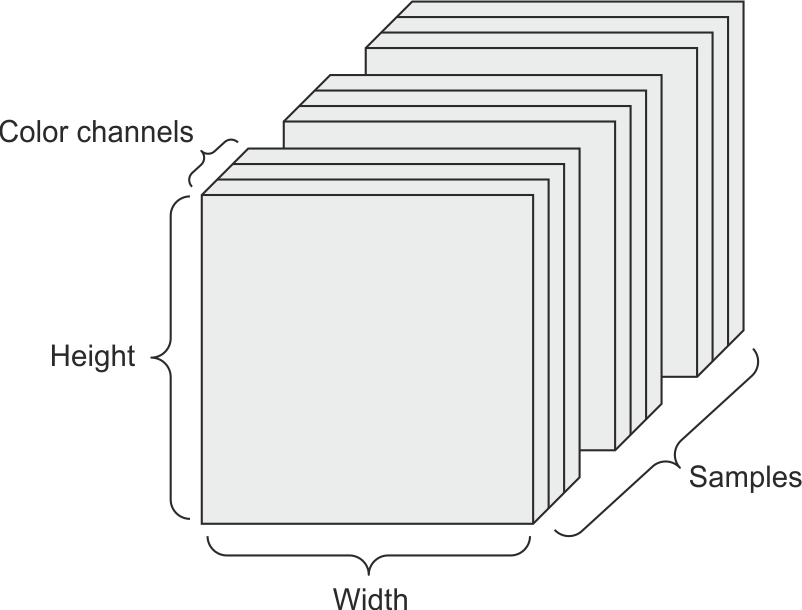

Hay dos convenciones para las formas de los tensores de imágenes: la convención de canales-última
(usado por TensorFlow) y la convención de canales primero (usado por Theano). El marco de aprendizaje automático de TensorFlow, de Google, coloca el eje de profundidad de color en el
end: (muestras, altura, ancho, color_depth). Mientras tanto, Theano coloca el color
eje de profundidad justo después del eje del lote: (muestras, color_depth, alto, ancho). Con la convención de Theano, los ejemplos anteriores se convertirían en (128, 1, 256, 256)
y (128, 3, 256, 256). El marco de Keras proporciona soporte para ambos formatos.

**2.2.12 Video data**

Los datos de video son uno de los pocos tipos de datos del mundo real para los que necesitará tensores 5D.
Un video puede entenderse como una secuencia de fotogramas, siendo cada fotograma una imagen en color.
Debido a que cada fotograma se puede almacenar en un tensor 3D (altura, ancho, color_depth), un
La secuencia de fotogramas se puede almacenar en un tensor 4D (fotogramas, altura, ancho, color_
profundidad) y, por lo tanto, se puede almacenar un lote de videos diferentes en un tensor de forma 5D
(muestras, marcos, alto, ancho, color_depth).
 Por ejemplo, un videoclip de YouTube de 60 segundos, 144 × 256 muestreado a 4 fotogramas por
el segundo tendría 240 cuadros. Un lote de cuatro videoclips de este tipo se almacenaría en un
tensor de forma (4, 240, 144, 256, 3). ¡Eso es un total de 106,168,320 valores! Si el
dtype del tensor era float32, entonces cada valor se almacenaría en 32 bits, por lo que el
tensor representaría 405 MB. ¡Pesado! Los videos que encuentras en la vida real son mucho
más livianos, porque no se almacenan en float32, y normalmente están comprimidos por un
factor grande (como en el formato MPEG).

**2.3 The gears of neural networks: tensor operations**

Por mucho que cualquier programa de computadora pueda reducirse en última instancia a un pequeño conjunto de
operaciones en entradas binarias (AND, OR, NOR, etc.), todas las transformaciones aprendidas
por redes neuronales profundas puede reducirse a un puñado de operaciones tensoriales aplicadas a
tensores de datos numéricos. Por ejemplo, es posible agregar tensores, multiplicar tensores,
y así.
  En nuestro ejemplo inicial, estábamos construyendo nuestra red apilando capas densas en
uno encima del otro. Una instancia de capa de Keras se ve así:

In [54]:
# keras.layers.Dense(512, activation='relu')

Esta capa se puede interpretar como una función, que toma como entrada un tensor 2D y
devuelve otro tensor 2D, una nueva representación del tensor de entrada. Específicamente, el
La función es la siguiente (donde W es un tensor 2D yb es un vector, ambos atributos del
capa):

In [55]:
# output = relu(dot(W, input) + b)

Desempaquetemos esto. Tenemos tres operaciones de tensor aquí: un producto escalar (punto) entre
el tensor de entrada y un tensor llamado W; una suma (+) entre el tensor 2D resultante y un vector b; y, finalmente, una operación relu. relu (x) es max (x, 0).

**NOTA:**  Aunque esta sección trata completamente de expresiones de álgebra lineal,
no encontrará ninguna notación matemática aquí. Encontré que matemática
Los programadores sin conocimientos matemáticos pueden dominar más fácilmente los conceptos si se expresan como fragmentos cortos de Python en lugar de ecuaciones matemáticas. Así que usaremos código Numpy en todo momento.

**2.3.1 Element-wise operations**

La operación relu y la suma son operaciones por elementos: operaciones que son
aplicado de forma independiente a cada entrada en los tensores que se están considerando. Esto significa
estas operaciones son altamente susceptibles a implementaciones masivamente paralelas (vectorizadas
implementaciones, un término que proviene de la arquitectura de supercomputadora de procesador vectorial del período 1970-1990). Si desea escribir una implementación de Python ingenua de una operación basada en elementos, use un bucle for, como en este ingenuo
implementación de una operación relu por elementos:

In [56]:
def naive_relu(x):
  assert len(x.shape) == 2

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
  return x

In [57]:
#You do the same for addition:

def naive_add(x, y):
  assert len(x.shape) == 2
  assert x.shape == y.shape

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x

Siguiendo el mismo principio, puede hacer multiplicaciones, restas, etc., por elementos.
  En la práctica, cuando se trata de matrices Numpy, estas operaciones están disponibles como funciones Numpy integradas y optimizadas, que delegan el trabajo pesado a un operador.
Implementación de subprogramas básicos de álgebra lineal (BLAS) si tiene uno instalado
(que deberías). BLAS son manipulación de tensor de bajo nivel, altamente paralela y eficiente
rutinas que normalmente se implementan en Fortran o C.
  Entonces, en Numpy, puede hacer la siguiente operación de elementos, y será increíblemente rápida:

In [59]:
import numpy as np

#z = x + y
#z = np.maximum(z,0.)

**2.3.2 Broadcasting**

Nuestra implementación ingenua anterior de naive_add solo admite la adición de tensores 2D con formas idénticas. Pero en la capa Densa introducida anteriormente, agregamos un 2D
tensor con un vector. ¿Qué sucede con la suma cuando las formas de los dos tensores
que se agrega difieren?
 Cuando sea posible, y si no hay ambigüedad, el tensor más pequeño se transmitirá a
coincidir con la forma del tensor más grande. La transmisión consta de dos pasos:
* Los ejes (llamados ejes de difusión) se agregan al tensor más pequeño para que coincida con el ndim de
el tensor más grande.
* El tensor más pequeño se repite junto con estos nuevos ejes para que coincida con la forma completa
del tensor mayor.

Veamos un ejemplo concreto. Considere X con forma (32, 10) ey con forma
(10,). Primero, agregamos un primer eje vacío ay, cuya forma se convierte en (1, 10). Entonces nosotros
repetir y 32 veces a lo largo de este nuevo eje, de modo que terminemos con un tensor Y con forma
(32, 10), donde Y [i,:] == y para i en el rango (0, 32). En este punto, podemos proceder a
agregue X e Y, porque tienen la misma forma.
 En términos de implementación, no se crea un nuevo tensor 2D, porque eso sería
terriblemente ineficaz. La operación de repetición es totalmente virtual: ocurre a nivel algorítmico más que a nivel de memoria. Pero pensando en el vector repetido 10 veces junto con un nuevo eje es un modelo mental útil. Esto es lo que es un ingenuo
la implementación se vería así:

In [60]:
def naive_add_matrix_and_vector(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[j]
  return x

Con la radiodifusión, generalmente puede aplicar operaciones de elementos de dos tensor si una
el tensor tiene forma (a, b,… n, n + 1,… m) y el otro tiene forma (n, n + 1,… m). los
la difusión ocurrirá automáticamente para los ejes a al n - 1.
  El siguiente ejemplo aplica la operación máxima por elementos a dos tensores
de diferentes formas a través de la transmisión:

In [61]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)


**2.3.3 Tensor dot**

La operación de punto, también llamada producto tensorial (que no debe confundirse con un producto por elementos) es la operación tensorial más común y útil. Contrariamente a
operaciones de elementos, combina entradas en los tensores de entrada.
  Un producto basado en elementos se realiza con el operador * en Numpy, Keras, Theano,
y TensorFlow. dot usa una sintaxis diferente en TensorFlow, pero tanto en Numpy como en
Kera lo hizo usando el operador de punto estándar:

In [64]:
import numpy as np
#z = np.dot(x, y)

Matemáticamente, ¿qué hace la operación de puntos? Comencemos con el producto escalar de
dos vectores xey. Se calcula de la siguiente manera:

In [65]:
def naive_vector_dot(x, y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]

  z = 0.
  for i in range(x.shape[0]):
    z += x[i] * y[i]
  return z

Habrá notado que el producto escalar entre dos vectores es un escalar y que solo
los vectores con el mismo número de elementos son compatibles para un producto escalar.
  También puede tomar el producto escalar entre una matriz x y un vector y, que devuelve
un vector donde los coeficientes son los productos escalares entre yy las filas de x. usted
implementarlo de la siguiente manera:

In [66]:
import numpy as np

def naive_matrix_vector_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      z[i] += x[i, j] * y[j]
  return z

También puede reutilizar el código que escribimos anteriormente, que resalta la relación
entre un producto matriz-vector y un producto vectorial:

In [67]:
def naive_matrix_vector_dot(x, y):
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    z[i] = naive_vector_dot(x[i, :], y)
  return z

Tenga en cuenta que tan pronto como uno de los dos tensores tenga un ndim mayor que 1, el punto ya no es simétrico, es decir, el punto (x, y) no es lo mismo que el punto (y, x).
  Por supuesto, un producto escalar se generaliza a tensores con un número arbitrario de ejes.
Las aplicaciones más comunes pueden ser el producto escalar entre dos matrices. usted
puede tomar el producto escalar de dos matrices xey (punto (x, y)) si y solo si
x.shape [1] == y.shape [0]. El resultado es una matriz con forma (x.shape [0],
y.shape [1]), donde los coeficientes son los productos vectoriales entre las filas de x
y las columnas de y. Aquí está la implementación ingenua:

In [68]:
def naive_matrix_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] == y.shape[0]

  z = np.zeros((x.shape[0], y.shape[1]))
  for i in range(x.shape[0]):
    for j in range(y.shape[1]):
      row_x = x[i, :]
      column_y = y[:, j]
      z[i, j] = naive_vector_dot(row_x, column_y)
  return z

Para comprender la compatibilidad de la forma del producto escalar, es útil visualizar los tensores de entrada y salida alineándolos como se muestra en la figura 2.5.

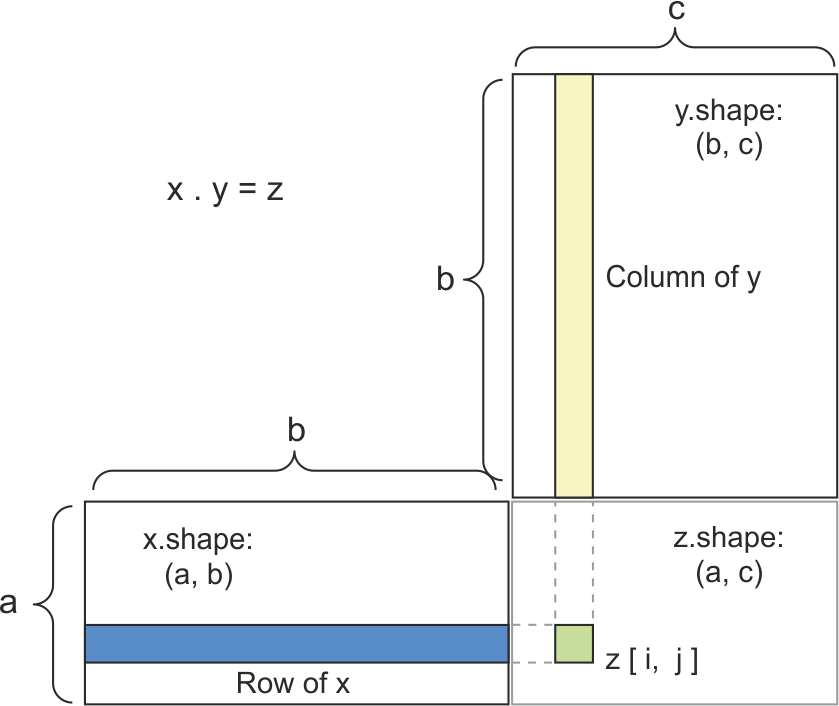

x, y, and z are pictured as rectangles (literal boxes of coefficients). Because the rows
and x and the columns of y must have the same size, it follows that the width of x must
match the height of y. If you go on to develop new machine-learning algorithms,
you’ll likely be drawing such diagrams often.
 More generally, you can take the dot product between higher-dimensional tensors,
following the same rules for shape compatibility as outlined earlier for the 2D case:

(a, b, c, d) . (d,) -> (a, b, c)

(a, b, c, d) . (d, e) -> (a, b, c, e)

**2.3.4 Tensor reshaping**

Un tercer tipo de operación tensorial que es esencial comprender es la remodelación del tensor.
Aunque no se usó en las capas densas en nuestro primer ejemplo de red neuronal,
lo usamos cuando preprocesamos los datos de dígitos antes de introducirlos en nuestra red:
train_images = train_images.reshape ((60000, 28 * 28))
Reformar un tensor significa reorganizar sus filas y columnas para que coincidan con la forma objetivo.
Naturalmente, el tensor remodelado tiene el mismo número total de coeficientes que el tensor inicial.
tensor. La remodelación se comprende mejor con ejemplos simples:

In [69]:
 x = np.array([[0., 1.],
               [2., 3.],
               [4., 5.]])


In [70]:
print(x.shape)

(3, 2)


In [75]:
x = x.reshape((6,1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [74]:
x = x.reshape((2,3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

Un caso especial de remodelación que se encuentra comúnmente es la transposición. Transponer un
matriz significa intercambiar sus filas y sus columnas, de modo que x [i,:] se convierte en x [:, i]:

In [76]:
x = np.zeros((300, 20))
x = np.transpose(x)
print(x.shape)

(20, 300)


**2.3.5 Geometric interpretation of tensor operations**

Debido a que el contenido de los tensores manipulados por las operaciones de tensor se puede interpretar como coordenadas de puntos en algún espacio geométrico, todas las operaciones de tensor tienen una
interpretación geométrica. Por ejemplo, consideremos la suma. Empezaremos con el siguiente vector:
A = [0,5, 1]
Es un punto en un espacio 2D (ver figura 2.6). Es común imaginarse un vector como una flecha
vinculando el origen con el punto, como se muestra en la figura 2.7.

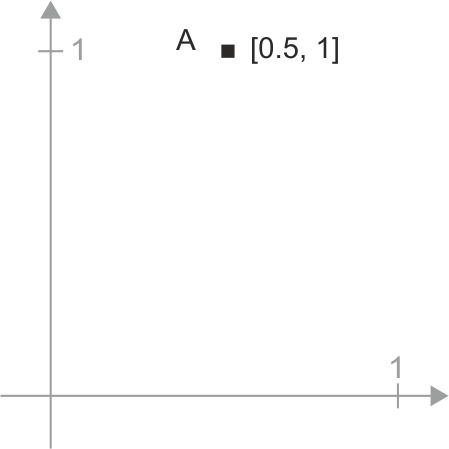

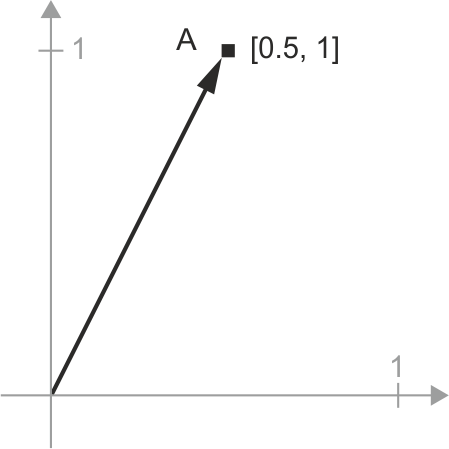

Consideremos un nuevo punto, B = [1, 0.25], que agregaremos al anterior. Esto es
hecho geométricamente encadenando las flechas vectoriales, con la ubicación resultante
siendo el vector que representa la suma de los dos vectores anteriores (ver figura 2.8).

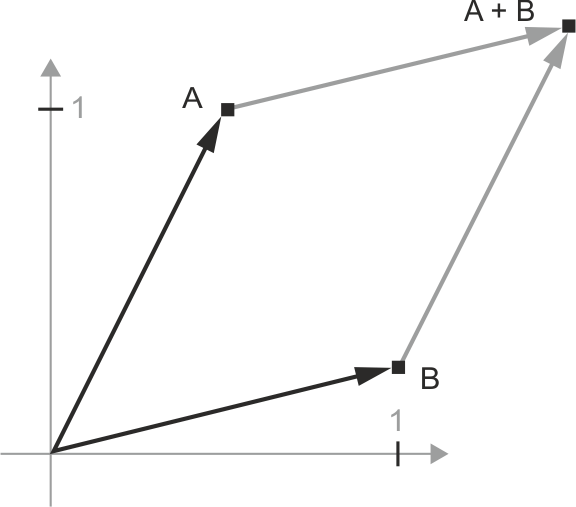

**2.3.6 A geometric interpretation of deep learning**

Acaba de aprender que las redes neuronales consisten enteramente en cadenas de operaciones tensoriales y
que todas estas operaciones tensoriales son solo transformaciones geométricas de los datos de entrada.
De ello se deduce que puede interpretar una red neuronal como una transformación geométrica muy compleja en un espacio de alta dimensión, implementada a través de una larga serie de pasos simples.
 En 3D, la siguiente imagen mental puede resultar útil. Imagina dos hojas de colores
papel: uno rojo y uno azul. Pon uno encima del otro. Ahora arrugarlos
juntos en una pequeña bola. Esa bola de papel arrugada son sus datos de entrada, y cada hoja
de papel es una clase de datos en un problema de clasificación. Qué red neuronal (o cualquier
otro modelo de aprendizaje automático) está destinado a hacer es descubrir una transformación del
bola de papel que lo desenrollaría, de modo que las dos clases fueran limpiamente separables
otra vez. Con el aprendizaje profundo, esto se implementaría como una serie de transformaciones simples del espacio 3D, como las que podrías aplicar en la bola de papel con los dedos, un movimiento a la vez.

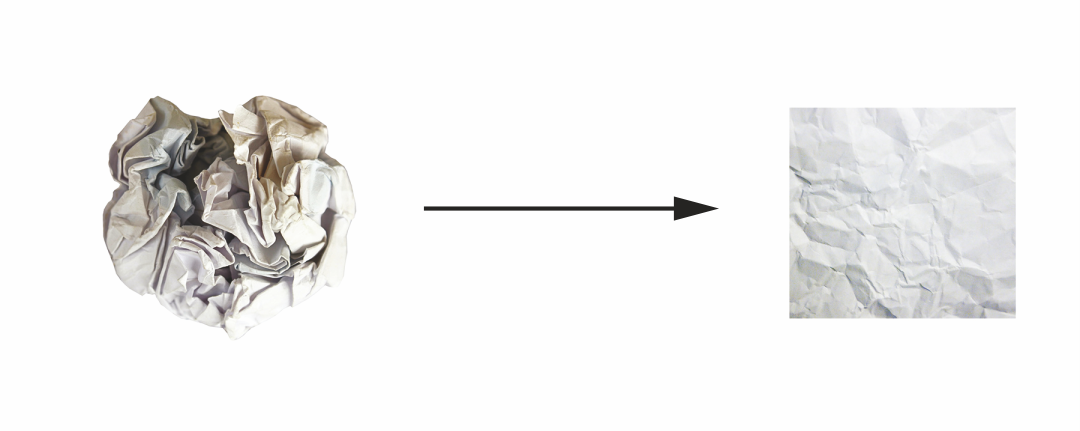

Desenrollar bolas de papel es de lo que se trata el aprendizaje automático: encontrar representaciones ordenadas para múltiples conjuntos de datos complejos y muy plegados. En este punto, debería tener un
bastante buena intuición de por qué el aprendizaje profundo sobresale en esto: toma el enfoque de
descomponer gradualmente una complicada transformación geométrica en una larga
cadena de elementales, que es más o menos la estrategia que seguiría un humano para
desenrollar una bola de papel. Cada capa de una red profunda aplica una transformación que
desenreda un poco los datos, y una pila profunda de capas hace que sea manejable
complicado proceso de desenredo.

**2.4 The engine of neural networks:
gradient-based optimization**

Como vio en la sección anterior, cada capa neuronal de nuestro primer ejemplo de red
transforma sus datos de entrada de la siguiente manera:

In [77]:
# output = relu(dot(W, input) + b)

En esta expresión, W y b son tensores que son atributos de la capa. Ellos se llaman
los pesos o parámetros entrenables de la capa (el kernel y los atributos de sesgo, respectivamente). Estos pesos contienen la información aprendida por la red de la exposición.
a los datos de entrenamiento.
  Inicialmente, estas matrices de peso se llenan con pequeños valores aleatorios (un paso llamado inicialización aleatoria). Por supuesto, no hay razón para esperar que relu (punto (W, entrada) + b),
cuando W y b son aleatorios, producirán representaciones útiles. Las representaciones resultantes no tienen sentido, pero son un punto de partida. Lo que sigue es gradualmente
ajuste estos pesos, basándose en una señal de retroalimentación. Este ajuste gradual, también llamado
formación, es básicamente el aprendizaje de que trata el aprendizaje automático.
  Esto sucede dentro de lo que se llama un ciclo de entrenamiento, que funciona de la siguiente manera. Repetir
estos pasos en un bucle, siempre que sea necesario:

* Dibuje un lote de muestras de entrenamiento x y los objetivos correspondientes y.
* Ejecute la red en x (un paso llamado pase directo) para obtener predicciones y_pred.
* Calcule la pérdida de la red en el lote, una medida del desajuste
entre y_pred y y.
* Actualice todos los pesos de la red de una manera que reduzca ligeramente la pérdida en este
lote.

Eventualmente, terminará con una red que tiene una pérdida muy baja en sus datos de entrenamiento: una
baja discrepancia entre las predicciones y_pred y los objetivos esperados y. La red tiene
"Aprendió" a mapear sus entradas para corregir los objetivos. Desde lejos, puede parecer magia, pero
cuando lo reduces a pasos elementales, resulta sencillo.
 El paso 1 parece bastante fácil: solo código de E / S. Los pasos 2 y 3 son simplemente la aplicación de un puñado de operaciones tensoriales, por lo que podría implementar estos pasos únicamente
de lo que aprendió en la sección anterior. La parte difícil es el paso 4: actualizar
los pesos de la red. Dado un coeficiente de peso individual en la red, ¿cómo se puede
calcula si el coeficiente debe aumentarse o disminuirse, y cómo
¿mucho?

 Una solución ingenua sería congelar todos los pesos de la red excepto el
considerando el coeficiente escalar, y pruebe con diferentes valores para este coeficiente. Vamos
digamos que el valor inicial del coeficiente es 0,3. Después de transmitir un lote de datos,
la pérdida de la red en el lote es 0.5. Si cambia el valor del coeficiente a 0,35
y vuelva a ejecutar el pase hacia adelante, la pérdida aumenta a 0,6. Pero si bajas el coeficiente a
0,25, la pérdida cae a 0,4. En este caso, parece que actualizar el coeficiente en -0,05 contribuiría a minimizar la pérdida. Esto debería repetirse para todos los coeficientes de la red.

  Pero tal enfoque sería terriblemente ineficaz, porque necesitaría calcular dos pases hacia adelante (que son costosos) para cada coeficiente individual (de
que hay muchos, generalmente miles y, a veces, hasta millones). Un enfoque mucho mejor es aprovechar el hecho de que todas las operaciones utilizadas en la red
son diferenciables y calculan el gradiente de la pérdida con respecto a la red
coeficientes. Luego puede mover los coeficientes en la dirección opuesta a la
gradiente, disminuyendo así la pérdida.

  Si ya sabe qué significa diferenciable y qué es un degradado, puede pasar a
sección 2.4.3. De lo contrario, las dos secciones siguientes le ayudarán a comprender estos
conceptos.


**2.4.1 What’s a derivative?**

Considere una función suave continua f (x) = y, mapeando un número real x a un nuevo
número real y. Debido a que la función es continua, un pequeño cambio en x solo puede resultar
en un pequeño cambio en y, esa es la intuición detrás de la continuidad. Digamos que aumenta x
por un pequeño factor épsilon_x: esto da como resultado un pequeño cambio épsilon_y ay:

f (x + épsilon_x) = y + épsilon_y

Además, debido a que la función es suave (su curva no tiene ángulos abruptos),
cuando epsilon_x es lo suficientemente pequeño, alrededor de un cierto punto p, es posible aproximar f como una función lineal de la pendiente a, de modo que epsilon_y se convierte en a * epsilon_x:

f (x + épsilon_x) = y + a * épsilon_x

Obviamente, esta aproximación lineal es válida solo cuando x está lo suficientemente cerca de p.
 La pendiente a se llama derivada de f en p. Si a es negativo, significa un pequeño cambio
de x alrededor de p resultará en una disminución de f (x) (como se muestra en la figura 2.10); y si a es positivo, un pequeño cambio en x resultará en un aumento de f (x). Además, el valor absoluto
de a (la magnitud de la derivada) le dice qué tan rápido este aumento o disminución
pasará.

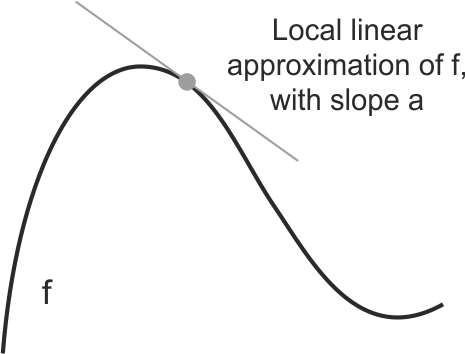

Para cada función diferenciable f (x) (diferenciable significa "se puede derivar": por ejemplo, se pueden derivar funciones suaves y continuas), existe una función derivada
f '(x) que asigna valores de x a la pendiente de la aproximación lineal local de f en aquellos puntos. Por ejemplo, la derivada de cos (x) es -sin (x), la derivada de f (x) = a * x
es f '(x) = a, y así sucesivamente.

  Si está intentando actualizar x por un factor épsilon_x para minimizar f (x), y
conoce la derivada de f, entonces su trabajo está hecho: la derivada completamente
describe cómo evoluciona f (x) a medida que cambia x. Si desea reducir el valor de f (x),
solo necesitas mover x un poco en la dirección opuesta a la derivada.

**2.4.2 Derivative of a tensor operation: the gradient**

Un gradiente es la derivada de una operación tensorial. Es la generalización del concepto
de derivadas a funciones de entradas multidimensionales: es decir, a funciones que toman
tensores como entradas.
 Considere un vector de entrada x, una matriz W, un objetivo y y una pérdida de función de pérdida. Usted puede
use W para calcular un candidato objetivo y_pred, y calcule la pérdida o el desajuste,
entre el candidato objetivo y_pred y el objetivo y:

y_pred = punto (W, x)

loss_value = loss (y_pred, y)

Si las entradas de datos xey están congeladas, esto se puede interpretar como una función que asigna valores de W a valores de pérdida:
pérdida_valor = f (W)
Digamos que el valor actual de W es W0. Entonces la derivada de f en el punto W0 es un tensor
gradiente (f) (W0) con la misma forma que W, donde cada coeficiente gradiente (f)
(W0) [i, j] indica la dirección y la magnitud del cambio en loss_value que
observar al modificar W0 [i, j]. Ese gradiente tensorial (f) (W0) es el gradiente de
la función f (W) = loss_value en W0.

 Ya viste que la derivada de una función f (x) de un coeficiente simple puede ser
interpretado como la pendiente de la curva de f. Asimismo, el gradiente (f) (W0) se puede interpretar como el tensor que describe la curvatura de f (W) alrededor de W0.

 Por esta razón, de la misma manera que, para una función f (x), puede reducir
el valor de f (x) moviendo x un poco en la dirección opuesta a la derivada,
con una función f (W) de un tensor, puede reducir f (W) moviendo W en el sentido opuesto
dirección desde el gradiente: por ejemplo, W1 = W0 - paso * gradiente (f) (W0) (donde
el paso es un pequeño factor de escala). Eso significa ir en contra de la curvatura, que intuitivamente debería ponerlo más abajo en la curva. Tenga en cuenta que se necesita el paso del factor de escala
porque el gradiente (f) (W0) solo se aproxima a la curvatura cuando estás cerca de W0,
para que no desee alejarse demasiado de W0.

**2.4.3 Stochastic gradient descent**

Dada una función diferenciable, es teóricamente posible encontrar su mínimo analíticamente: se sabe que el mínimo de una función es un punto donde la derivada es 0, entonces todos
lo que tiene que hacer es encontrar todos los puntos donde la derivada va a 0 y verificar cuál
de estos puntos, la función tiene el valor más bajo.

Aplicado a una red neuronal, eso significa encontrar analíticamente la combinación de
valores de peso que producen la función de pérdida más pequeña posible. Esto se puede hacer resolviendo la ecuación gradiente (f) (W) = 0 para W. Esta es una ecuación polinomial de N variables, donde N es el número de coeficientes en la red. Aunque sera
posible resolver tal ecuación para N = 2 o N = 3, hacerlo es intratable para
Redes neuronales, donde el número de parámetros nunca es inferior a unos pocos miles.
ya menudo pueden ser varias decenas de millones.

  En su lugar, puede utilizar el algoritmo de cuatro pasos descrito al principio de esta sección: modifique los parámetros poco a poco en función del valor de pérdida actual en un lote aleatorio de datos. Dado que se trata de una función diferenciable, puede
calcular su gradiente, lo que le brinda una manera eficiente de implementar el paso 4. Si
actualice los pesos en la dirección opuesta al gradiente, la pérdida será un poco
menos cada vez:

1 Dibuje un lote de muestras de entrenamiento x y los objetivos correspondientes y.

2 Ejecute la red en x para obtener predicciones y_pred.

3 Calcule la pérdida de la red en el lote, una medida de la falta de coincidencia
entre y_pred y y.

4 Calcule el gradiente de la pérdida con respecto a los parámetros de la red (un
pase hacia atrás).

5 Mueva los parámetros un poco en la dirección opuesta al degradado, por
ejemplo W - = paso * gradiente, reduciendo un poco la pérdida en el lote.

¡Suficientemente fácil! Lo que acabo de describir se llama descenso de gradiente estocástico de mini lotes (minibatch SGD). El término estocástico se refiere al hecho de que cada lote de datos se extrae en
aleatorio (estocástico es un sinónimo científico de aleatorio). La figura 2.11 ilustra lo que sucede en 1D, cuando la red tiene solo un parámetro y solo tiene un entrenamiento
muestra.

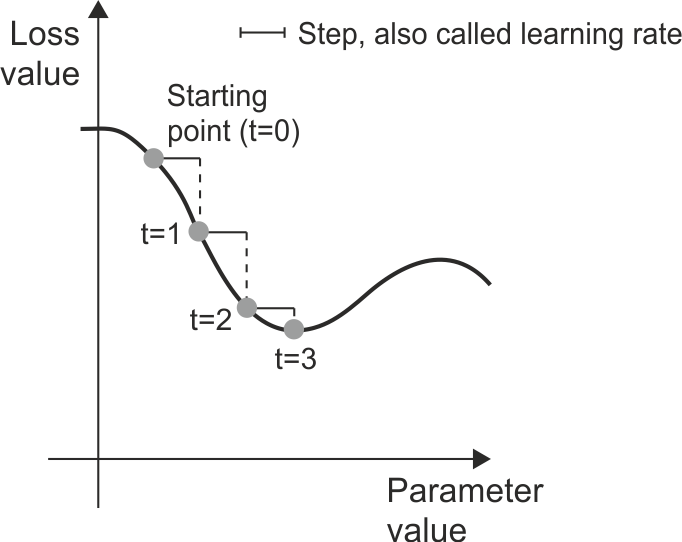

Como puede ver, intuitivamente es importante elegir un valor razonable para el factor de paso.
Si es demasiado pequeño, el descenso por la curva tomará muchas iteraciones y podría
atrapado en un mínimo local. Si el paso es demasiado grande, sus actualizaciones pueden terminar llevándolo a
ubicaciones completamente aleatorias en la curva.

 Tenga en cuenta que una variante del algoritmo SGD de mini lotes sería extraer una sola muestra y objetivo en cada iteración, en lugar de extraer un lote de datos. Esto sería
verdadero SGD (a diferencia del SGD de mini lotes). Alternativamente, yendo al extremo opuesto,
podría ejecutar cada paso en todos los datos disponibles, lo que se denomina SGD por lotes. Cada actualización
entonces sería más preciso, pero mucho más caro. El compromiso eficiente
entre estos dos extremos es utilizar mini lotes de tamaño razonable.

 Aunque la figura 2.11 ilustra el descenso de gradiente en un espacio de parámetros 1D, en la práctica utilizará el descenso de gradiente en espacios muy dimensionales: cada coeficiente de peso
en una red neuronal hay una dimensión libre en el espacio, y puede haber decenas de miles o incluso millones de ellos. Para ayudarlo a desarrollar la intuición sobre las superficies de pérdida,
También puede visualizar el descenso de gradiente a lo largo de una superficie de pérdida 2D, como se muestra en la figura 2.12. Pero
posiblemente no puedas visualizar cómo se ve el proceso real de entrenamiento de una red neuronal
como: no puedes representar un espacio de 1.000.000 de dimensiones de una manera que tenga sentido para
humanos. Como tal, es bueno tener en cuenta que las intuiciones que desarrolla a través
estas representaciones de baja dimensión pueden no ser siempre precisas en la práctica. Esta
históricamente ha sido una fuente de problemas en el mundo de la investigación de aprendizaje profundo.

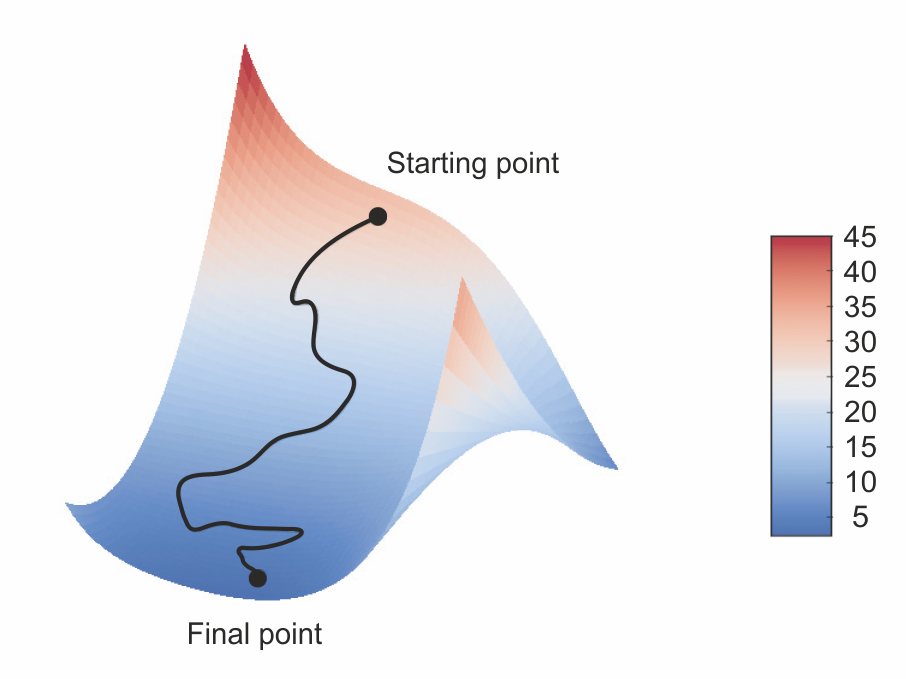

Además, existen múltiples variantes de SGD que se diferencian al tener en cuenta
actualizaciones de peso anteriores al calcular la próxima actualización de peso, en lugar de solo
mirando el valor actual de los gradientes. Hay, por ejemplo, SGD con impulso, así como Adagrad, RMSProp y varios otros. Estas variantes se conocen como métodos de optimización u optimizadores. En particular, el concepto de impulso, que se utiliza en
muchas de estas variantes merecen su atención. Momentum aborda dos problemas con
SGD: velocidad de convergencia y mínimos locales. Considere la figura 2.13, que muestra la
curva de una pérdida en función de un parámetro de red.

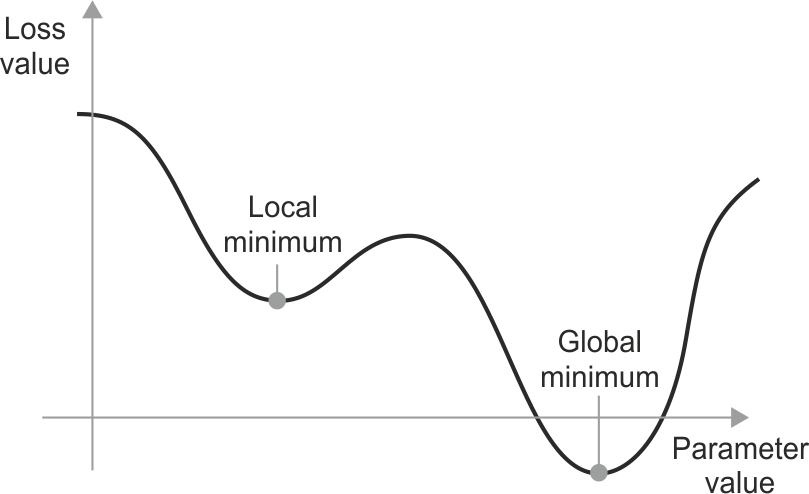

Como puede ver, alrededor de un cierto valor de parámetro, hay un mínimo local: alrededor
En ese punto, moverse a la izquierda daría lugar a un aumento de la pérdida, pero también a la derecha.
Si el parámetro en consideración se optimiza a través de SGD con un pequeño
tasa de aprendizaje, entonces el proceso de optimización se atascaría en el mínimo local
en lugar de llegar al mínimo global.
 Puede evitar estos problemas utilizando el impulso, que se inspira en la física. Una imagen mental útil aquí es pensar en el proceso de optimización como una pequeña bola
rodando por la curva de pérdidas. Si tiene suficiente impulso, la pelota no se atascará en un
barranco y acabará en el mínimo global. El impulso se implementa moviendo
la pelota en cada paso basado no solo en el valor de pendiente actual (aceleración actual)
sino también en la velocidad actual (resultante de una aceleración pasada). En la práctica, este
significa actualizar el parámetro w basado no solo en el valor actual del gradiente sino también
en la actualización de parámetros anterior, como en esta implementación ingenua:

In [79]:
# past_velocity = 0.
# momentum = 0.1
# while loss > 0.01:
# w, loss, gradient = get_current_parameters()
# velocity = past_velocity * momentum + learning_rate * gradient
# w=w+ momentum * velocity - learning_rate * gradient
# past_velocity = velocity
# update_parameter(w)

**2.4.4 Chaining derivatives: the Backpropagation algorithm**

En el algoritmo anterior, asumimos casualmente que debido a que una función es diferenciable, podemos calcular explícitamente su derivada. En la práctica, una función de red neuronal
consta de muchas operaciones tensoras encadenadas, cada una de las cuales tiene un simple,
derivado conocido. Por ejemplo, esta es una red f compuesta de tres operaciones tensoras, a, byc, con matrices de peso W1, W2 y W3:

f (W1, W2, W3) = a (W1, b (W2, c (W3)))

El cálculo nos dice que tal cadena de funciones se puede derivar usando la siguiente identidad, llamada regla de la cadena: f (g (x)) = f '(g (x)) * g' (x). Aplicando la regla de la cadena al
el cálculo de los valores de gradiente de una red neuronal da lugar a un algoritmo llamada retropropagación (también llamada a veces diferenciación en modo inverso). La propagación hacia atrás comienza con el valor de pérdida final y funciona hacia atrás desde las capas superiores hasta las capas inferiores, aplicando la regla de la cadena para calcular la contribución que cada parámetro
tenía en el valor de la pérdida.

 Hoy en día, y en los próximos años, la gente implementará redes en
frameworks que son capaces de diferenciación simbólica, como TensorFlow. Esto significa
que, dada una cadena de operaciones con una derivada conocida, pueden calcular un gradiente
función para la cadena (aplicando la regla de la cadena) que mapea los valores de los parámetros de red
a los valores de gradiente. Cuando tiene acceso a dicha función, el pase hacia atrás es
reducido a una llamada a esta función de gradiente. Gracias a la diferenciación simbólica,
nunca tendrá que implementar el algoritmo Backpropagation a mano. Por esta razón, nosotros
no perderá su tiempo y su enfoque en derivar la formulación exacta del algoritmo de retropropagación en estas páginas. Todo lo que necesita es una buena comprensión de cómo
La optimización basada en gradientes funciona.

**2.5 Looking back at our first example**

Ha llegado al final de este capítulo y ahora debería tener una comprensión general de lo que sucede detrás de escena en una red neuronal. Volvamos a
el primer ejemplo y revise cada parte a la luz de lo que ha aprendido en el
tres secciones anteriores.
  Estos fueron los datos de entrada:

In [1]:
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# train_images = train_images.reshape((60000, 28 * 28))
# train_images = train_images.astype('float32') / 255
# test_images = test_images.reshape((10000, 28 * 28))
# test_images = test_images.astype('float32') / 255

Ahora comprende que las imágenes de entrada se almacenan en tensores Numpy, que son
aquí formateado como tensores float32 de forma (60000, 784) (datos de entrenamiento) y (10000,
784) (datos de prueba), respectivamente.

In [2]:
# model = models.Sequential()
# model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
# model.add(layers.Dense(10, activation='softmax'))

Ahora comprende que esta red consta de una cadena de dos capas densas, que
cada capa aplica unas pocas operaciones de tensor simples a los datos de entrada, y que estos
Las operaciones implican tensores de peso. Tensores de peso, que son atributos de las capas,
es donde persiste el conocimiento de la red.


In [3]:
## Compilado:

# network.compile(optimizer='rmsprop',
# loss='categorical_crossentropy',
# metrics=['accuracy'])


Ahora comprende que categorical_crossentropy es la función de pérdida que se utiliza
como una señal de retroalimentación para aprender los tensores de peso, y que la fase de entrenamiento
intentar minimizar. También sabe que esta reducción de la pérdida se produce a través del descenso de gradiente estocástico minibatch. Las reglas exactas que gobiernan un uso específico de gradiente
Los descensos están definidos por el optimizador rmsprop que se pasa como primer argumento.

In [4]:
## Training:

#model.fit(train_images, train_labels, epochs=5, batch_size=128)

Ahora comprende lo que sucede cuando llama a fit: la red comenzará a iterar
en los datos de entrenamiento en mini lotes de 128 muestras, 5 veces más (cada iteración
todos los datos de entrenamiento se denominan época). En cada iteración, la red calculará la
gradientes de los pesos con respecto a la pérdida en el lote y actualice los pesos en consecuencia. Después de estas 5 épocas, la red habrá realizado 2,345 gradientes
actualizaciones (469 por época), y la pérdida de la red será lo suficientemente baja como para que la
La red será capaz de clasificar dígitos escritos a mano con alta precisión.

  En este punto, ya sabe la mayor parte de lo que hay que saber sobre las redes neuronales.

**Chapter summary**

* Aprender significa encontrar una combinación de parámetros de modelo que minimice una función de pérdida para un conjunto dado de muestras de datos de entrenamiento y sus objetivos correspondientes.
* El aprendizaje ocurre al extraer lotes aleatorios de muestras de datos y sus
objetivos, y calcular el gradiente de los parámetros de red con
con respecto a la pérdida del lote. Luego, los parámetros de red se mueven
un poco (la magnitud del movimiento se define por la tasa de aprendizaje) en el
dirección opuesta al gradiente.
* Todo el proceso de aprendizaje es posible gracias al hecho de que las redes neuronales son cadenas de operaciones tensoriales diferenciables y, por lo tanto, es posible
para aplicar la regla de derivación de la cadena para encontrar la función de gradiente mapeando los parámetros actuales y el lote actual de datos a un valor de gradiente.
* Dos conceptos clave que verá con frecuencia en capítulos futuros son pérdida y optimizadores. Estas son las dos cosas que debe definir antes de comenzar a introducir datos en una red.
* La pérdida es la cantidad que intentará minimizar durante el entrenamiento, por lo que
debe representar una medida del éxito de la tarea que está tratando de resolver.
* El optimizador especifica la forma exacta en que el gradiente de la pérdida
utilizarse para actualizar parámetros: por ejemplo, podría ser el optimizador RMSProp, SGD con momentum, etc.